In [3]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import cv2
import numpy as np

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [4]:
def load_image(path):
    with Image.open(path).convert("RGB") as img:
        full_res_image = np.array(img)

    # resize so not too big for GPU
    max_width = 1024
    height, width = full_res_image.shape[:2]
    new_width = max_width if width > max_width else width
    image_shrink_factor = new_width / width  # will be used later for sampling from full res image
    new_height = int(height * image_shrink_factor)
    image = cv2.resize(full_res_image, (new_width, new_height))

    return image, full_res_image

In [73]:
import matplotlib.pyplot as plt

def run_clip(np_image):
    # first item should be the flower
    # labels = ["flower", "leaf", "fruit"]  # bad, it thinks everything is a fruit
    # labels = ["flower", "no flower"]  # meh
    # labels = ["flower", "leaf", "dirt", "sky"]  # does pretty well for finding flowers
    # labels = ["flower", "leaf",, "nut"]  # doesn't really find the woody fruits
    labels = ["flower", "leaf"]  # quite good
    # labels = ["a photo of a flower", "a photo of a leaf"]  # more broad, includes many more photos, many which are not flowers
    # labels = ["a photo containing a flower", "a photo containing mostly leaves"]  # misses many flowers
    
    pil_image = Image.fromarray(np_image)
    inputs = processor(text=labels, images=pil_image, return_tensors="pt")  # specifying padding=True seems to help if there are spaces in your input

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

    np_probs = probs.squeeze().detach().numpy()
    return labels, np_probs


def show_clip_results(labels, probs, np_image):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    axes[0].imshow(np_image)
    axes[0].axis('off')
    axes[1].bar(labels, probs)
    plt.show()

## Test running on crops (not needed)

In [ ]:
# import os

# directory_path = R"G:\.shortcut-targets-by-id\1BCCfXZq98f4rFOF8m0AweybL4qQakAUB\Summer Dive 2022\Monteverde Imagery - Stephanie\River\Dry Flight\100MEDIA"
# # image_basename = "P0870381.JPG"  # fern, shrub (close-up)
# # image_basename = "P0950389.JPG"  # fern, shrub, star plant (close-up)
# # image_basename = "P1070401.JPG"  # jungly
# image_basename = "P1360430.JPG"  # shrubs, colorful leaves
# # image_basename = "P1420437.JPG"  # epiphyte and shrubs
# # image_basename = "P0800374.JPG"  # vine
# # image_basename = "P1480443.JPG"  # fruit, and forest floor
# # image_basename = "P1540449.JPG"  # stream surrounded by bushes
# # image_basename = "P1550450.JPG"  # fungus on a log and a few plants

# image_path = os.path.join(directory_path, image_basename)


# image, _ = load_image(image_path)
# plt.imshow(image)
# plt.axis('off')
# plt.show()


# n_rows = 4
# n_cols = 4

# crop_width = int(image.shape[1] / n_cols)
# crop_height = int(image.shape[0] / n_rows)

# labels, probs = run_clip(image)
# show_clip_results(labels, probs, image)

# for r in range(n_rows):
#     for c in range(n_cols):
#         x = c * crop_width
#         y = r * crop_height
#         crop = image[y:y+crop_height, x:x+crop_width]
#         labels, probs = run_clip(crop)
#         show_clip_results(labels, probs, crop)
        

## Test running CLIP on lots of full images

P2040499.JPG
P1010395.JPG
P1100404.JPG
P2070502.JPG
P1090403.JPG
P1260420.JPG
P2150510.JPG
P1520447.JPG


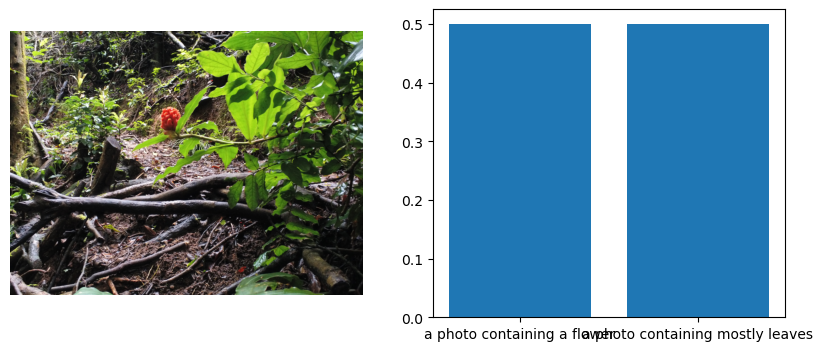

P2000495.JPG
P1500445.JPG
P1640459.JPG
P1990494.JPG
P1930488.JPG
P0820376.JPG
P1560451.JPG
P1220416.JPG
P1580453.JPG
P1530448.JPG
P0680362.JPG
P1970492.JPG
P1510446.JPG


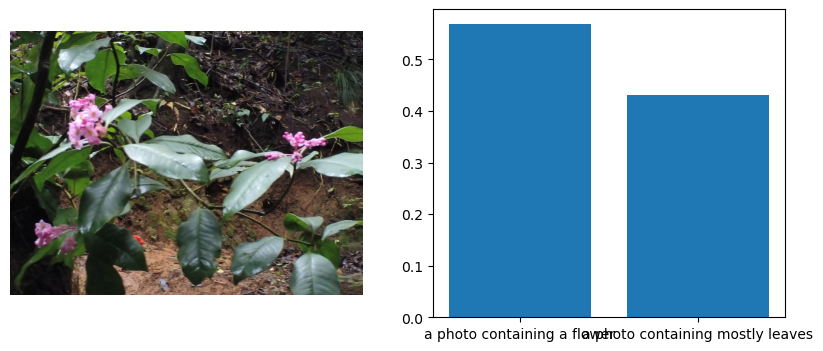

P0780372.JPG
P1920487.JPG
P1490444.JPG
P2170512.JPG
P1720467.JPG
P1700465.JPG
P1670462.JPG
P1620457.JPG
P0800374.JPG
P2130508.JPG
P1270421.JPG
P2120507.JPG
P2270522.JPG
P1130407.JPG
P0900384.JPG
P1170411.JPG
P1880483.JPG
P1860481.JPG
P0910385.JPG
P1180412.JPG
P1070401.JPG
P1480443.JPG


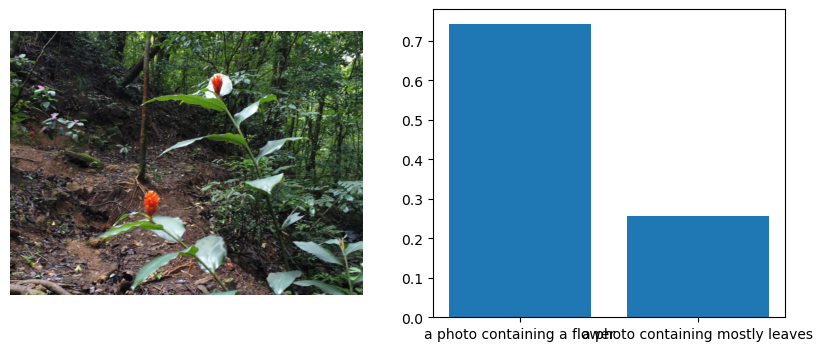

P1290423.JPG
P1330427.JPG
P0990393.JPG
P1690464.JPG
P0760370.JPG
P1120406.JPG
P2180513.JPG
P2260521.JPG
P2220517.JPG
P1110405.JPG
P1660461.JPG
P1400435.JPG
P2330528.JPG
P1080402.JPG
P1060400.JPG
P2250520.JPG
P0750369.JPG
P1760471.JPG
P0960390.JPG
P1870482.JPG
P1570452.JPG
P2230518.JPG
P1940489.JPG
P1310425.JPG
P1730468.JPG
P1830478.JPG
P1910486.JPG
P1650460.JPG
P1590454.JPG
P2140509.JPG
P1740469.JPG
P0950389.JPG
P1320426.JPG
P1780473.JPG
P1550450.JPG
P1030397.JPG
P2030498.JPG
P2050500.JPG
P2320527.JPG
P1810476.JPG
P0930387.JPG
P1980493.JPG
P0840378.JPG
P1800475.JPG
P2340529.JPG
P0690363.JPG
P0980392.JPG
P0730367.JPG
P1340428.JPG
P1250419.JPG
P0970391.JPG
P1610456.JPG
P1710466.JPG
P0790373.JPG
P1960491.JPG
P1770472.JPG
P0920386.JPG
P1420437.JPG
P0830377.JPG
P1680463.JPG
P1950490.JPG
P2190514.JPG
P2160511.JPG
P0850379.JPG
P1790474.JPG
P2240519.JPG
P2310526.JPG
P2100505.JPG
P2200515.JPG
P0640358.JPG
P0720366.JPG
P1350429.JPG
P1630458.JPG
P1280422.JPG
P1840479.JPG
P0660360.JPG
P1410436.JPG

In [74]:
import os

directory_path = R"G:\.shortcut-targets-by-id\1BCCfXZq98f4rFOF8m0AweybL4qQakAUB\Summer Dive 2022\Monteverde Imagery - Stephanie\River\Dry Flight\100MEDIA"

show_flowers_only = True

for image_basename in os.listdir(directory_path):
    if os.path.splitext(image_basename)[1] != ".JPG":
        continue
    if image_basename.startswith("._"):
        continue  # likely error

    print(image_basename)
    image, full_res_image = load_image(os.path.join(directory_path, image_basename))
    labels, probs = run_clip(image)
    if not show_flowers_only or probs[0] == max(probs):
        show_clip_results(labels, probs, image)